<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Project:</span> Customer Segments</h1>
<hr>


This is a capstone project and all necessary permissions have been taken to use the data for analysis and modelling purpose to reach the objectives of this project.

## Project Context

- The client here is an online retailer based in UK and they sell all occassion gifts and many of their customers are.  wholesalers.<br>


- Majority of their customers are from UK but they have a small percent of customers from other countries.<br>


- They want to **group their international customers** based on their previous purchase patterns.<br>


- They like to provide **more tailored services to their international customers** and also want improve their marketting style in international market.


## Current Structure

- The retailer currently just group their customers based on country.

- There is a large number of countries which defeats the purpose of creating groups.
- Some countries have very few customers.
- This approach treats large and small customers the same, regardless of their purchase patterns.


## Goal
- The goal is to build a clustering model which will make customer clusters and should factor in both **aggregate sales pattern** and **specific items purchased**.

So, the problem specifics are :

   > Deliverable: **Clusters for customers**<br>
   Machine Learning Task: **Clustering**<br>
   Target Variable: **N/A (Unsupervised learning)**<br>
   Win Condition: **Subjective Results**

### 1. Collecting Data

- The dataset is adapted from a synthetic one because companies rarely release their customer data.
- The features of this dataset are realistic and hand vetted. I have taken proper permission from EliteDataScience team to use the data for this capstone project.
- The data is in csv format **int_online_tx.csv**. It consists of all the international transactions.

In [9]:
from __future__ import print_function

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

Using Pandas library to load the data.

In [2]:
df = pd.read_csv('int_online_tx.csv')

### 2. Transaction-level data exploration

In [3]:
df.shape

(35116, 8)

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [5]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7067,546236,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,3/10/11 12:48,3.75,12370.0,Cyprus
10212,551398,84509B,SET OF 4 FAIRY CAKE PLACEMATS,4,4/28/11 13:09,3.75,12417.0,Spain
1453,539403,22505,MEMO BOARD COTTAGE DESIGN,4,12/17/10 12:21,4.95,12647.0,Germany
28104,572065,22932,BAKING MOULD TOFFEE CUP CHOCOLATE,2,10/20/11 13:06,2.55,12556.0,Spain
4450,542629,22029,SPACEBOY BIRTHDAY CARD,24,1/31/11 9:57,0.42,12731.0,France
32520,577606,21231,SWEETHEART CERAMIC TRINKET BOX,12,11/21/11 9:11,1.25,12462.0,Spain
19427,563288,22892,SET OF SALT AND PEPPER TOADSTOOLS,12,8/15/11 12:53,1.25,12656.0,France
3073,541269,22174,PHOTO CUBE,12,1/17/11 11:01,1.65,12626.0,Germany
26894,571035,23169,CLASSIC GLASS COOKIE JAR,6,10/13/11 12:50,4.15,12446.0,RSA
27438,571328,22489,PACK OF 12 TRADITIONAL CRAYONS,24,10/17/11 11:27,0.42,12473.0,Germany


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      35116 non-null int64
StockCode      35116 non-null object
Description    35116 non-null object
Quantity       35116 non-null int64
InvoiceDate    35116 non-null object
UnitPrice      35116 non-null float64
CustomerID     33698 non-null float64
Country        35116 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


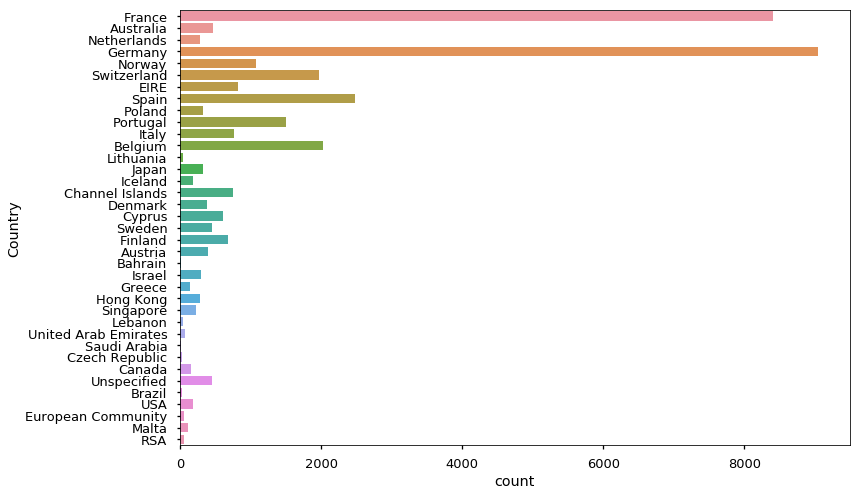

In [10]:
# Make figsize 8x9
plt.figure(figsize=(12,8))

# Bar plot by country
sns.countplot(y = 'Country', data=df)
plt.show()

### 3. Transaction-level Claening

In [13]:
df.isnull().sum() # Missing data by features

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

Transactions with missing customer id is pointless in this context becuase our goal is to cluster customers to provide more tailored service. Since customer id is missing, we can safely remove these transactions from our data. They are actually *unwanted observations*

In [14]:
df = df[df['CustomerID'].notnull()] # Removing missing customer ids
df.shape

(33698, 8)

In [16]:
df['CustomerID'] = df['CustomerID'].astype(int) # Converting float to int as id shouldn't be float

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


Since the data do not provide sales figure, we need to create an interaction feature from quatity and Unitprice.

In [17]:
# Create 'Sales' interaction feature
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Display first 5 Sales values in the transaction dataset
df['Sales'].head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

In [18]:
# Save cleaned transaction-level data
df.to_csv('cleaned_transactions.csv', index=None)

### 4. Customer-level feature engineering
We cleaned the dataset at transaction level, but our goal is to make customer clusters. So we have to roll-up the dataset to customer level which we will be using for our modelling purpose.

In [19]:
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583,France,40.8
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583,France,30.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583,France,53.1
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583,France,70.8
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583,France,46.8


In [20]:
# Creating customer-level data for unique transactions
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions' : 'nunique'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [21]:
# Display invoice data for first 5 customers
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [23]:
# Creating customer-level data for unique product and total product purchased 
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg({'total_products' : 'count',
                                                       'total_unique_products' : 'nunique'})

# Display product data for first 5 customers
product_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [24]:
# Creating customer-level data for total sale and average product value 
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg({
    'total_sales' : 'sum',
    'avg_product_value' : 'mean'
})
                                                    

# Display sales data for first 5 customers
sales_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,avg_product_value,total_sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


In [25]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID','InvoiceNo']).Sales.agg({'cart_value' : 'sum'})

# Reset index
cart_data.reset_index(inplace = True)

# Display cart data for first 5 CARTS
cart_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [26]:
# Customer-level data for cart values
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({
    'avg_cart_value' : 'mean',
    'min_cart_value' : 'min',
    'max_cart_value' : 'max'
})


# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,
12347,224.82,1294.32,615.714286
12348,227.44,892.80,449.310000
12349,1757.55,1757.55,1757.550000
12350,334.40,334.40,334.400000
12352,120.33,840.30,313.255000


In [27]:
# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


In [28]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')

In [29]:
# Get item_dummies
item_dummies = pd.get_dummies(df.StockCode)

# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head(11)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


In [30]:
item_dummies.shape

(33698, 2575)

In [31]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display few rows of item_data
item_data.head(11)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
12353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
item_data.shape

(414, 2574)

In [33]:
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [34]:
item_data.to_csv('item_data.csv')

We can see that most of the items were purchased less than a handful times, making it a very sparse data.<br> 
One way we can reduce the dimensionality of this item data is to set a threshold for keeping features. That means, we will consider only the most popular selling items. For this, we decide that theshold would be 20 popular items.

In [37]:
item_data.sum().sort_values(ascending=False).head(20)# Save item_data.csv

POST      1055
22326      271
22423      222
22554      197
22556      179
21731      169
22328      166
22629      160
22551      158
21212      143
20725      141
23084      140
20750      132
20719      128
20726      123
85099B     123
21080      122
22139      117
22630      115
22961      114
dtype: int64

In [36]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values(ascending=False).head(20).index
top_20_items

Index([u'POST', u'22326', u'22423', u'22554', u'22556', u'21731', u'22328',
       u'22629', u'22551', u'21212', u'20725', u'23084', u'20750', u'20719',
       u'20726', u'85099B', u'21080', u'22139', u'22630', u'22961'],
      dtype='object')

In [38]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape

(414, 20)

In [39]:
# Display first few rows of top_20_item_data
top_20_item_data.head(11)

,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
12355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [40]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('threshold_item_data.csv')

So, we have successfully prepared our transaction-level data, customer-level data and item-level data. We also sorted 20 most popular items.<br>

We can also use PCA to reduce dimensionality.

In [41]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [42]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   6.81399381e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.67067488e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -1.98625838e-15],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,   3.72965547e-16],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   3.96904731e-15]])

In [45]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

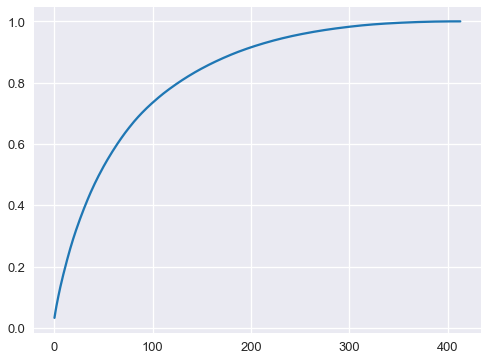

In [53]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

The chart shows that to capture about 80% of variance, we will require only around 125 features. That is pretty good reduction of features. From 2574 to 125 is about 95% of reduction.

In [59]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205403

In [60]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414L, 125L)

In [61]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828925,-0.495551,3.093825,-0.633635,-11.534076,2.162019,7.116916,5.335999,4.424309,4.637103,2.316507,12.310818,1.986323,-11.431385,5.617736,-2.177358,7.666183,-12.135689,-16.049116,-5.948703,7.813395,40.518175,-35.575320,-17.556967,6.869289,20.886731,2.296634,-26.162617,-32.579668,7.880933,12.355952,6.829451,-32.956401,-4.409471,-17.238930,-11.272702,-14.487766,-2.765100,4.728775,-6.992399,-1.470696,10.602980,1.240692,3.084477,5.336250,-0.414974,1.512275,-6.415305,3.066067,...,2.316526,2.571057,-0.778042,-1.947778,-1.707517,1.258196,0.440589,-1.465625,-1.936186,-3.506245,0.235298,-2.029424,0.680061,0.509253,1.255790,-1.924212,0.183612,0.292423,-0.483456,0.655151,-0.495949,-0.521844,-0.049076,-0.576808,-0.339248,-0.884789,-0.601951,-0.727208,-0.065024,-0.290193,0.367442,-0.204382,-0.477862,1.033590,1.165465,1.196537,-0.209098,0.535730,-0.214779,-0.256260,0.434690,-0.593956,-0.947292,-0.008073,0.347413,0.419392,0.071749,0.345954,0.205684,-0.089100
12348,-4.219842,1.226246,-1.881925,-0.174462,0.817868,1.160810,-0.871622,-0.846927,0.460309,0.854460,-0.401739,0.981459,-1.104677,0.770580,-0.092914,-0.313213,-0.449081,1.207095,0.381726,-0.469646,0.184525,0.053538,0.499252,0.373509,1.227245,-0.770680,-0.268100,0.849209,-0.368020,-0.572558,1.011170,-0.581039,0.950986,-0.738109,0.354505,-0.392081,-0.300982,0.394313,0.153358,0.324130,-0.462466,0.715918,1.193119,-0.214063,-0.871764,-0.059394,-0.419440,-1.615160,-0.368282,0.444808,...,-1.115046,-0.823141,-0.509026,-0.347473,0.057587,0.123613,-0.560567,-0.373800,0.760881,0.142846,0.013186,0.117356,-1.871208,-0.131796,-0.606880,-0.775242,0.073246,1.150233,-0.472509,0.945308,-0.024774,-0.195216,1.066137,-1.399981,0.057730,0.193654,0.917682,-0.596331,1.318196,0.571527,1.459333,-0.842412,-0.551068,-0.645653,-1.118408,0.073033,-0.230696,-0.644961,-0.456726,-1.071538,-1.533400,1.321920,-0.359489,-1.485644,-2.679323,-0.626986,-1.056089,-0.832696,-0.380048,0.792921
12349,-1.260853,2.387375,-0.073227,-1.119505,-0.034384,-3.715021,-0.343269,-0.149388,-0.790107,-0.379082,1.570844,0.182430,0.223489,-0.053272,3.178801,-0.512356,-1.839680,0.383315,0.317868,-0.003888,-0.416808,0.454018,-0.787775,1.745583,-1.479933,0.762529,-0.908862,0.771905,0.498079,-1.347468,0.266666,0.675306,0.072629,-0.224550,-0.693019,-1.535197,0.785296,-1.413073,-0.101816,-0.919833,0.099083,-0.111112,-0.176432,0.692377,1.385715,-0.254646,-0.111312,-0.180073,0.875441,1.714870,...,2.366911,-1.063992,1.638894,0.629557,1.033774,0.098382,-0.911573,0.614484,1.086378,-0.700575,1.320367,0.504166,-2.625313,-2.900642,0.529752,-2.545238,-2.263557,-1.708676,-0.838206,-2.727907,-0.075970,-0.638530,0.865612,1.045232,1.062808,3.369089,1.008045,-1.252161,0.129082,-0.812440,0.690316,-1.188111,-0.684335,-2.213053,-2.993394,-0.211530,-3.322072,-4.460813,-0.421709,4.162903,0.985606,0.018438,-0.652348,-0.915558,1.524980,2.217653,-2.261701,0.877285,4.771390,-1.134083
12350,-4.929316,-0.714899,-1.580952,-0.469637,-0.116321,0.647812,0.112703,-1.335886,1.546850,-1.190618,-0.213185,1.057624,-0.474972,0.855194,-1.304772,0.242696,0.268211,1.952625,-0.226293,0.569088,-0.186174,0.905142,1.365496,0.178372,-0.259167,-0.170204,-0.683255,1.080336,-0.155949,-0.399278,0.240116,0.633918,-1.452111,-0.187010,-0.314666,-0.305750,-1.359487,0.001365,0.575089,-0.250659,0.593425,-0.216058,0.290932,0.522827,-0.539139,-0.102038,-1.476783,0

In [62]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

### 5. Cluster Analysis

In [63]:
# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

Let's import the cleaned and wrangled data

In [64]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

In [65]:
# Shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


Let's create a threshold_df by joining base_df with threshold_item_data.

In [66]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first few rows of threshold_df
threshold_df.head(11)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12353,1,4,4,22.250000,89.00,89.00,89.00,89.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,1,58,58,18.610345,1079.40,1079.40,1079.40,1079.400000,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
12355,1,13,13,35.338462,459.40,459.40,459.40,459.400000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,3,59,53,47.651356,2811.43,58.35,2271.62,937.143333,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Also create a pca_df by joining base_df with pca_item_data.

In [67]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first few rows of pca_df
pca_df.head(11)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876141,4.828925,-0.495551,3.093825,-0.633635,-11.534076,2.162019,7.116916,5.335999,4.424309,4.637103,2.316507,12.310818,1.986323,-11.431385,5.617736,-2.177358,7.666183,-12.135689,-16.049116,-5.948703,7.813395,40.518175,-35.575320,-17.556967,6.869289,20.886731,2.296634,-26.162617,-32.579668,7.880933,12.355952,6.829451,-32.956401,-4.409471,-17.238930,-11.272702,-14.487766,-2.765100,4.728775,-6.992399,-1.470696,...,2.316526,2.571057,-0.778042,-1.947778,-1.707517,1.258196,0.440589,-1.465625,-1.936186,-3.506245,0.235298,-2.029424,0.680061,0.509253,1.255790,-1.924212,0.183612,0.292423,-0.483456,0.655151,-0.495949,-0.521844,-0.049076,-0.576808,-0.339248,-0.884789,-0.601951,-0.727208,-0.065024,-0.290193,0.367442,-0.204382,-0.477862,1.033590,1.165465,1.196537,-0.209098,0.535730,-0.214779,-0.256260,0.434690,-0.593956,-0.947292,-0.008073,0.347413,0.419392,0.071749,0.345954,0.205684,-0.089100
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219842,1.226246,-1.881925,-0.174462,0.817868,1.160810,-0.871622,-0.846927,0.460309,0.854460,-0.401739,0.981459,-1.104677,0.770580,-0.092914,-0.313213,-0.449081,1.207095,0.381726,-0.469646,0.184525,0.053538,0.499252,0.373509,1.227245,-0.770680,-0.268100,0.849209,-0.368020,-0.572558,1.011170,-0.581039,0.950986,-0.738109,0.354505,-0.392081,-0.300982,0.394313,0.153358,0.324130,-0.462466,0.715918,...,-1.115046,-0.823141,-0.509026,-0.347473,0.057587,0.123613,-0.560567,-0.373800,0.760881,0.142846,0.013186,0.117356,-1.871208,-0.131796,-0.606880,-0.775242,0.073246,1.150233,-0.472509,0.945308,-0.024774,-0.195216,1.066137,-1.399981,0.057730,0.193654,0.917682,-0.596331,1.318196,0.571527,1.459333,-0.842412,-0.551068,-0.645653,-1.118408,0.073033,-0.230696,-0.644961,-0.456726,-1.071538,-1.533400,1.321920,-0.359489,-1.485644,-2.679323,-0.626986,-1.056089,-0.832696,-0.380048,0.792921
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260853,2.387375,-0.073227,-1.119505,-0.034384,-3.715021,-0.343269,-0.149388,-0.790107,-0.379082,1.570844,0.182430,0.223489,-0.053272,3.178801,-0.512356,-1.839680,0.383315,0.317868,-0.003888,-0.416808,0.454018,-0.787775,1.745583,-1.479933,0.762529,-0.908862,0.771905,0.498079,-1.347468,0.266666,0.675306,0.072629,-0.224550,-0.693019,-1.535197,0.785296,-1.413073,-0.101816,-0.919833,0.099083,-0.111112,...,2.366911,-1.063992,1.638894,0.629557,1.033774,0.098382,-0.911573,0.614484,1.086378,-0.700575,1.320367,0.504166,-2.625313,-2.900642,0.529752,-2.545238,-2.263557,-1.708676,-0.838206,-2.727907,-0.075970,-0.638530,0.865612,1.045232,1.062808,3.369089,1.008045,-1.252161,0.129082,-0.812440,0.690316,-1.188111,-0.684335,-2.213053,-2.993394,-0.211530,-3.322072,-4.460813,-0.421709,4.162903,0.985606,0.018438,-0.652348,-0.915558,1.524980,2.217653,-2.261701,0.877285,4.771390,-1.134083
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929316,-0.714899,-1.580952,-0.469637,-0.116321,0.647812,0.112703,-1.335886,1.546850,-1.190618,-0.213185,1.057624,-0.474972,0.855194,-1.304772,0.242696,0.268211,1.952625,-0.226293,0.569088,-0.186174,0.905142,1.365496,0.178372,-0.259167,-0.170204,-0.683255,1.080336,-0.155949,-0.399278,0.240116,0.633918,-1.452111,-0.187010,-0.314666,-0.305750,-1.359487,0.001365,0.575089,-0.2506

In [68]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters = 3, random_state=123))

In [69]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [70]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)
base_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,1
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0


Let's visualize these clusters for 2 features. 

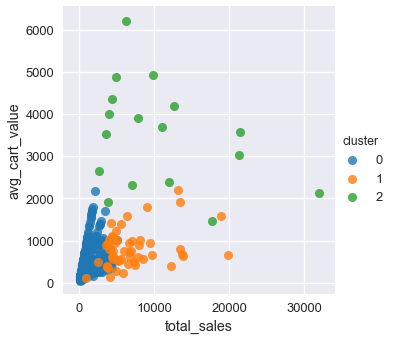

In [76]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data = base_df, hue = 'cluster', fit_reg=False)
plt.show()

The second set of features we'll consider is **threshold_df**.

- This includes the purchase pattern features from our analytical base table.
- This also includes the purchase counts for the 20 most popular items.

In [77]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

# Fit K-Means pipeline
kmeans.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [78]:
# Save clusters to threshold_df
threshold_df['cluster'] = kmeans.predict(threshold_df)
threshold_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2


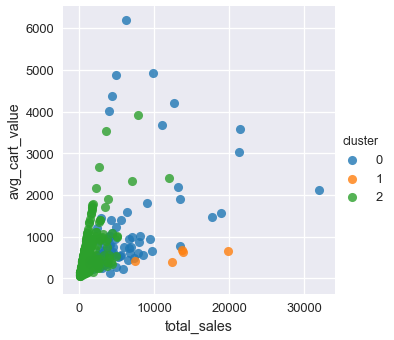

In [80]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data = threshold_df, hue='cluster', fit_reg=False)
plt.show()

The last set of features we'll consider is **pca_df**.

- This includes the purchase pattern features from our analytical base table.
- This also includes the first 125 principal component features from the item data.

In [81]:
# K-Means model pipeline
km = make_pipeline(StandardScaler(), KMeans(n_clusters=3,random_state=123))

# Fit K-Means pipeline
km.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [82]:
# Save clusters to pca_df
pca_df['cluster'] = km.predict(pca_df)
pca_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876141,4.828925,-0.495551,3.093825,-0.633635,-11.534076,2.162019,7.116916,5.335999,4.424309,4.637103,2.316507,12.310818,1.986323,-11.431385,5.617736,-2.177358,7.666183,-12.135689,-16.049116,-5.948703,7.813395,40.518175,-35.575320,-17.556967,6.869289,20.886731,2.296634,-26.162617,-32.579668,7.880933,12.355952,6.829451,-32.956401,-4.409471,-17.238930,-11.272702,-14.487766,-2.765100,4.728775,-6.992399,-1.470696,...,2.571057,-0.778042,-1.947778,-1.707517,1.258196,0.440589,-1.465625,-1.936186,-3.506245,0.235298,-2.029424,0.680061,0.509253,1.255790,-1.924212,0.183612,0.292423,-0.483456,0.655151,-0.495949,-0.521844,-0.049076,-0.576808,-0.339248,-0.884789,-0.601951,-0.727208,-0.065024,-0.290193,0.367442,-0.204382,-0.477862,1.033590,1.165465,1.196537,-0.209098,0.535730,-0.214779,-0.256260,0.434690,-0.593956,-0.947292,-0.008073,0.347413,0.419392,0.071749,0.345954,0.205684,-0.089100,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219842,1.226246,-1.881925,-0.174462,0.817868,1.160810,-0.871622,-0.846927,0.460309,0.854460,-0.401739,0.981459,-1.104677,0.770580,-0.092914,-0.313213,-0.449081,1.207095,0.381726,-0.469646,0.184525,0.053538,0.499252,0.373509,1.227245,-0.770680,-0.268100,0.849209,-0.368020,-0.572558,1.011170,-0.581039,0.950986,-0.738109,0.354505,-0.392081,-0.300982,0.394313,0.153358,0.324130,-0.462466,0.715918,...,-0.823141,-0.509026,-0.347473,0.057587,0.123613,-0.560567,-0.373800,0.760881,0.142846,0.013186,0.117356,-1.871208,-0.131796,-0.606880,-0.775242,0.073246,1.150233,-0.472509,0.945308,-0.024774,-0.195216,1.066137,-1.399981,0.057730,0.193654,0.917682,-0.596331,1.318196,0.571527,1.459333,-0.842412,-0.551068,-0.645653,-1.118408,0.073033,-0.230696,-0.644961,-0.456726,-1.071538,-1.533400,1.321920,-0.359489,-1.485644,-2.679323,-0.626986,-1.056089,-0.832696,-0.380048,0.792921,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260853,2.387375,-0.073227,-1.119505,-0.034384,-3.715021,-0.343269,-0.149388,-0.790107,-0.379082,1.570844,0.182430,0.223489,-0.053272,3.178801,-0.512356,-1.839680,0.383315,0.317868,-0.003888,-0.416808,0.454018,-0.787775,1.745583,-1.479933,0.762529,-0.908862,0.771905,0.498079,-1.347468,0.266666,0.675306,0.072629,-0.224550,-0.693019,-1.535197,0.785296,-1.413073,-0.101816,-0.919833,0.099083,-0.111112,...,-1.063992,1.638894,0.629557,1.033774,0.098382,-0.911573,0.614484,1.086378,-0.700575,1.320367,0.504166,-2.625313,-2.900642,0.529752,-2.545238,-2.263557,-1.708676,-0.838206,-2.727907,-0.075970,-0.638530,0.865612,1.045232,1.062808,3.369089,1.008045,-1.252161,0.129082,-0.812440,0.690316,-1.188111,-0.684335,-2.213053,-2.993394,-0.211530,-3.322072,-4.460813,-0.421709,4.162903,0.985606,0.018438,-0.652348,-0.915558,1.524980,2.217653,-2.261701,0.877285,4.771390,-1.134083,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929316,-0.714899,-1.580952,-0.469637,-0.116321,0.647812,0.112703,-1.335886,1.546850,-1.190618,-0.213185,1.057624,-0.474972,0.855194,-1.304772,0.242696,0.268211,1.952625,-0.226293,0.569088,-0.186174,0.905142,1.365496,0.178372,-0.259167,-0.170204,-0.683255,1.080336,-0.155949,-0.399278,0.240116,0.633918,-1.452111,-0.187010,-0.314666,-0.305750,-1.359487,0.001365,0.575089,-0.250659,0.593425,-0.2160

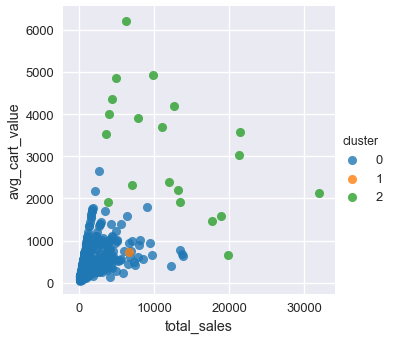

In [84]:
# Scatterplot, colored by cluster
sns.lmplot(x = 'total_sales', y = 'avg_cart_value', data = pca_df, hue = 'cluster', fit_reg = False)
plt.show()

### 6. Model Comparisons

In [85]:
# Check all indices are identical
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )

True
True


**Adjusted rand score** is a similarity measure between two clusterings. It counts the observations that were assigned to the same or different clusters by two different clusterings.

In [86]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [87]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df['cluster'], threshold_df['cluster'])

0.60213549517823428

In [89]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df['cluster'],pca_df['cluster'])

0.40522220474779586

The score between **(base_df, threshold_df)** is greater than the score between **(base_df, pca_df)**.<br>
That means the **clusters** from the **base_df** data and **threshold_data** have better similarity betwen them.